In [2]:
import pandas as pd
import numpy as np
import scipy
import os

In [1]:
#os.listdir()

In [5]:
x = pd.read_excel("18AEK-cv02-2.xls")

In [6]:
x['i']=x['i']-1955

In [7]:
x['i'].corr(x['Yi'])

0.9839231846762845

In [8]:
x

,i,Unnamed: 1,Ci,Yi
0,1,NaN,281.4,309.3
1,2,NaN,288.1,316.1
2,3,NaN,290.0,318.8
3,4,NaN,307.3,333.0
4,5,NaN,316.1,340.3
5,6,NaN,322.5,350.5
6,7,NaN,338.4,367.2
7,8,NaN,353.3,381.2
8,9,NaN,373.7,408.1
9,10,NaN,397.7,434.8


In [9]:
cov = x[['i','Yi']].cov()
cov

,i,Yi
i,20.000000,342.571429
Yi,342.571429,6061.078286


In [10]:
cov['i'][1]/np.sqrt(cov['i'][0])/np.sqrt(cov['Yi'][1])

0.9839231846762845

In [11]:
X = np.array(x[['i','Yi']])
X

array([[  1. , 309.3],
       [  2. , 316.1],
       [  3. , 318.8],
       [  4. , 333. ],
       [  5. , 340.3],
       [  6. , 350.5],
       [  7. , 367.2],
       [  8. , 381.2],
       [  9. , 408.1],
       [ 10. , 434.8],
       [ 11. , 458.9],
       [ 12. , 477.5],
       [ 13. , 499. ],
       [ 14. , 513.5],
       [ 15. , 533.2]])

In [12]:
D = np.matmul(X.T,X)
D

array([[1.24000000e+03, 5.31272000e+04],
       [5.31272000e+04, 2.51808936e+06]])

In [13]:
np.linalg.det(D)

299931426.56000024

In [14]:
import statsmodels.api as s

In [15]:
nobs = 100



X = s.add_constant(x[['Yi','i']])

# Fit regression model
results = s.OLS(x['Ci'], X).fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     Ci   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5129.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.55e-18
Time:                        17:29:09   Log-Likelihood:                -33.569
No. Observations:                  15   AIC:                             73.14
Df Residuals:                      12   BIC:                             75.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1603     13.026      4.081      0.0

C:\Users\ghost_000\Miniconda3\envs\tf-gpu\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [17]:
X

,const,Yi,i
0,1.0,309.3,1
1,1.0,316.1,2
2,1.0,318.8,3
3,1.0,333.0,4
4,1.0,340.3,5
5,1.0,350.5,6
6,1.0,367.2,7
7,1.0,381.2,8
8,1.0,408.1,9
9,1.0,434.8,10


In [18]:
results.resid

0     0.768034
1    -0.209079
2    -3.007158
3     1.238937
4     1.998528
5    -1.749002
6    -0.719391
7     1.272023
8    -0.609619
9     1.254057
10    1.406876
11   -2.844040
12    1.397923
13    4.526040
14   -4.724129
dtype: float64

In [21]:
import statsmodels.stats.diagnostic as dg

In [22]:
GQ = dg.HetGoldfeldQuandt()

In [23]:
GQ.run(y = x['Ci'], x = x[['Yi','i']])

(3.122771222898834, 0.09908161788756696, 'increasing')

### => Golffeld-Quandt nezamítá homoskedasticitu

In [24]:
dg.het_white(resid=results.resid, exog=X)

(13.461862830056956,
 0.019414427788362477,
 15.753701014194855,
 0.00032126890126166056)

### => zamítám homoskedasticitu

In [25]:
dg.het_breuschpagan(resid=results.resid, exog_het = x[['Yi','i']])

(8.492320293458551,
 0.0035664867452498685,
 8.482298514475762,
 0.0043921475333665114)

### => zamítám homoskedasticitu

In [27]:
results.params

const    53.160312
Yi        0.726594
i         2.736277
dtype: float64

In [28]:
import matplotlib.pyplot as plt

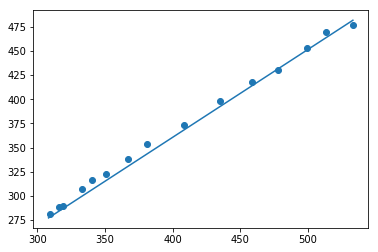

In [29]:
plt.figure("regrese")
plt.scatter(x['Yi'], x['Ci'])
Y = np.linspace(min(x['Yi'])-1, max(x['Yi']), 1000)
time = np.linspace(min(x['i'])-1, max(x['i']), 1000)
plt.plot(Y, results.params[0]+results.params[1]*Y+results.params[2]*time )
plt.show()